# Summarize experimental data

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for seaborn plots
sns.set_theme(style="white")

In [17]:
group_colors = {
    'male': '#D7301F',  # Vibrant red with an orangish hue (for males)
    'female': '#F4A40B',  # Strong yellow (for females)
    'atoke': '#654321'   # Duller brown (for atokes)
}

### V log I

In [18]:
# Load and process VlogI data
VlogI_df = pd.read_csv('../data/Pd_VlogI.csv')
VlogI_df['Condition'] = VlogI_df['Group'] + "_" + VlogI_df['EyePosition']
VlogI_df['Recording'] = VlogI_df['id'] + "_" + VlogI_df['Group'] + "_" + VlogI_df['EyePosition']
VlogI_df['Recording'] = VlogI_df['Recording'].astype('category')
VlogI_df['logI_scaled'] = (VlogI_df['logI'] - VlogI_df['logI'].mean()) / VlogI_df['logI'].std()
VlogI_df.head()

,logI,ID,id,Recorder,Group,EyePosition,Response,Condition,Recording,logI_scaled
0,2.4,jjb03,v_a1,JJB,atoke,posterior,0.887097,atoke_posterior,v_a1_atoke_posterior,1.643658
1,1.7,jjb03,v_a1,JJB,atoke,posterior,0.919355,atoke_posterior,v_a1_atoke_posterior,1.318231
2,1.4,jjb03,v_a1,JJB,atoke,posterior,1.000000,atoke_posterior,v_a1_atoke_posterior,1.178763
3,0.7,jjb03,v_a1,JJB,atoke,posterior,0.790323,atoke_posterior,v_a1_atoke_posterior,0.853336
4,0.4,jjb03,v_a1,JJB,atoke,posterior,0.919355,atoke_posterior,v_a1_atoke_posterior,0.713867


In [19]:
# Grouped summary by condition
VlogI_grouped = VlogI_df.groupby('Condition').agg(
    id=('id', 'nunique'),
    Recordings=('Recording', 'nunique'),
    EyePosition=('EyePosition', 'nunique'),
    Group=('Group', 'nunique')
)
VlogI_grouped

,id,Recordings,EyePosition,Group
Condition,,,,
atoke_anterior,9,9,1,1
atoke_posterior,10,10,1,1
female_anterior,3,3,1,1
female_posterior,4,4,1,1
male_anterior,8,8,1,1
male_posterior,4,4,1,1


In [20]:
# ** V-Log I curves were interpolated from 9 anterior and 11 posterior atoke eyes, 8 anterior and 5 posterior male epitoke eyes, and 3 anterior and 4 posterior female epitoke eyes.**
VlogI_df.groupby('Recording').first().groupby('Condition').size()

C:\Users\jkirwan\AppData\Local\Temp\ipykernel_18760\2297294346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  VlogI_df.groupby('Recording').first().groupby('Condition').size()


Condition
atoke_anterior       9
atoke_posterior     10
female_anterior      3
female_posterior     4
male_anterior        8
male_posterior       4
dtype: int64

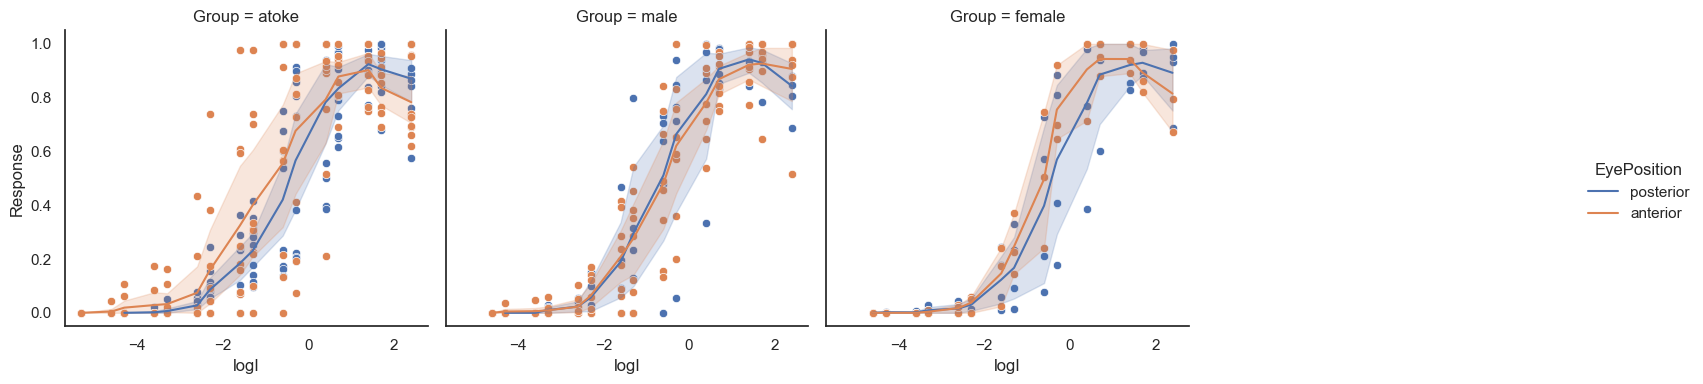

In [21]:
# Plotting data by Recording and EyePosition
g = sns.FacetGrid(VlogI_df, col="Group", hue="EyePosition", col_wrap=4, height=4)
g.map(sns.scatterplot, "logI", "Response")
g.map(sns.lineplot, "logI", "Response")
g.add_legend()
sns.despine()
plt.show()

In [22]:
VlogI_df.describe()

,logI,Response,logI_scaled
count,588.000000,588.000000,5.880000e+02
mean,-1.135544,0.414480,3.398642e-17
std,2.151022,0.403659,1.000000e+00
min,-5.300000,0.000000,-1.936036e+00
25%,-3.300000,0.000000,-1.006245e+00
50%,-1.300000,0.241694,-7.645473e-02
75%,0.700000,0.856573,8.533360e-01
max,2.400000,1.000000,1.643658e+00


### Liminal absolute sensitivity

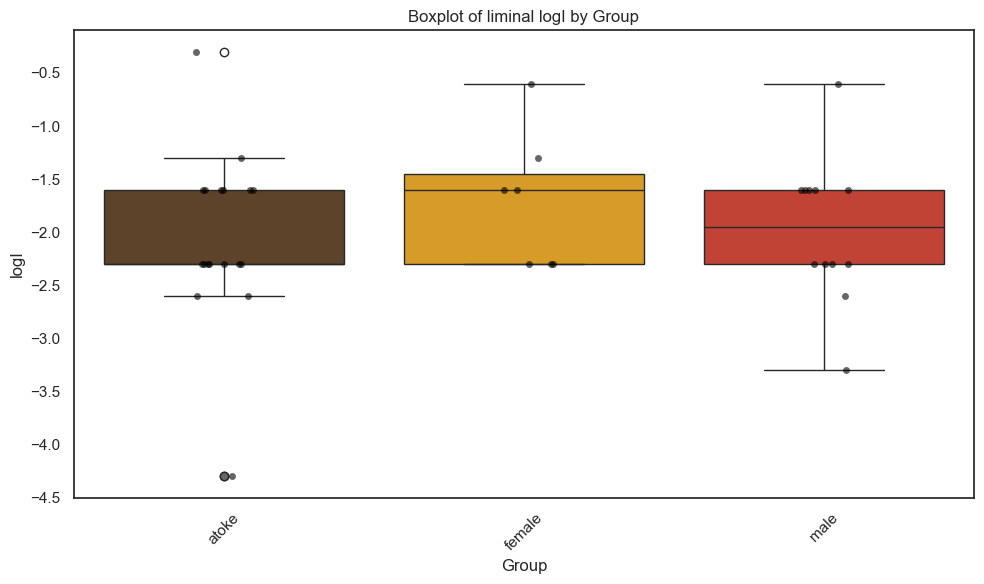

In [31]:
# Sort the DataFrame by 'freq_Hz'
VlogI_df_sorted = VlogI_df.sort_values('logI')

# Get the rows with the largest response below the threshold
liminal_df = VlogI_df_sorted[VlogI_df_sorted['Response'] > 0.05].groupby(['Recording'], observed=True).agg(  # Updated to include observed=True
    logI=('logI', 'first'), Response=('Response', 'first'))

# Reset index to make 'Recording' and 'freq_Hz' regular columns again
liminal_df = liminal_df.reset_index()

liminal_df = liminal_df.merge(VlogI_df_sorted[['Recording', 'logI', 'id', 'Condition', 'Recorder', 'Group']], on=['Recording','logI'], how='left')
liminal_df = liminal_df.drop_duplicates(subset=['Recording', 'logI'])

Hz_mean = liminal_df['logI'].mean()
Hz_std  = liminal_df['logI'].std()
liminal_df['logI_scaled'] = (liminal_df['logI'] - Hz_mean) / Hz_std

# Plot boxplot of logI by Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='logI', data=liminal_df, palette=group_colors, hue='Group', legend=False)  # Updated to include hue='Group' and legend=False
sns.stripplot(x='Group', y='logI', data=liminal_df, color='black', jitter=True, alpha=0.6)
plt.title('Boxplot of liminal logI by Group')
plt.xlabel('Group')
plt.ylabel('logI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\jkirwan\AppData\Local\Temp\ipykernel_18760\1077772086.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medial_df = VlogI_df_sorted[VlogI_df_sorted['Response'] >= 0.5].groupby(['Recording']).agg(
C:\Users\jkirwan\AppData\Local\Temp\ipykernel_18760\1077772086.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(  x='Group', y='logI', data=medial_df,  palette=group_colors)


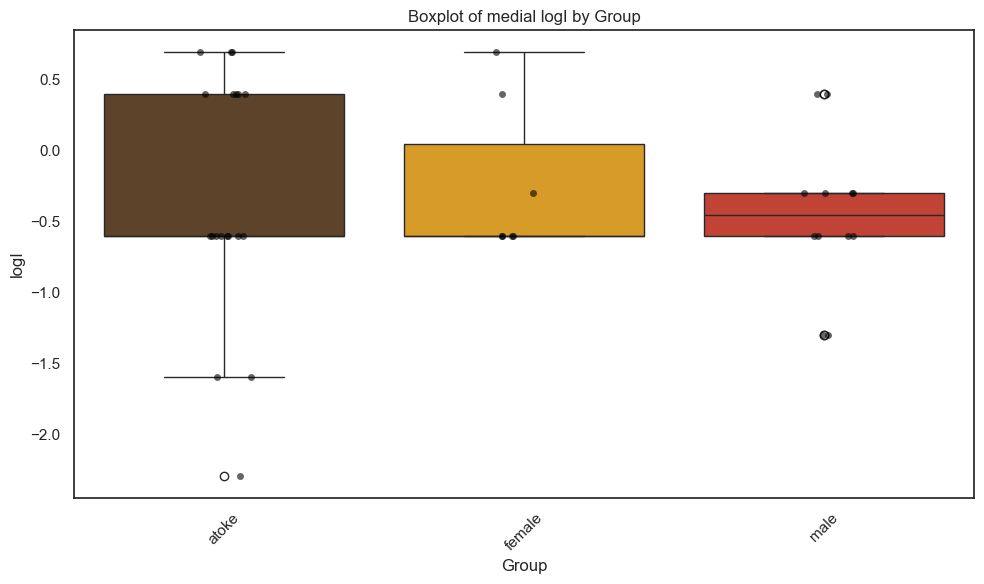

In [24]:
# Sort the DataFrame by 'freq_Hz'
VlogI_df_sorted = VlogI_df.sort_values('logI')

# Get the rows with the largest reponse below the threshold
medial_df = VlogI_df_sorted[VlogI_df_sorted['Response'] >= 0.5].groupby(['Recording']).agg(
    logI=('logI', 'first'), Response=('Response', 'first'))

# Reset index to make 'Recording' and 'freq_Hz' regular columns again
medial_df = medial_df.reset_index()

medial_df = medial_df.merge(VlogI_df_sorted[['Recording', 'logI', 'id', 'Condition', 'Recorder', 'Group']], on=['Recording','logI'], how='left')
medial_df = medial_df.drop_duplicates(subset=['Recording', 'logI'])

Hz_mean = medial_df['logI'].mean()
Hz_std  = medial_df['logI'].std()
medial_df['logI_scaled'] = (medial_df['logI'] - Hz_mean) / Hz_std

# Plot boxplot of logI by Group
plt.figure(figsize=(10, 6))
sns.boxplot(  x='Group', y='logI', data=medial_df,  palette=group_colors)
sns.stripplot(x='Group', y='logI', data=medial_df, color='black', jitter=True, alpha=0.6)
plt.title('Boxplot of medial logI by Group')
plt.xlabel('Group')
plt.ylabel('logI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Spectral Data Analysis

In [25]:
# Load and process Spectral data
spectral_df = pd.read_csv('../data/Pd_spectral_sensitivity.csv')
spectral_df['Condition'] = spectral_df['Group'].astype(str) + spectral_df['EyePosition']
spectral_df['Recording'] = spectral_df['id'].astype(str) + spectral_df['Group'].astype(str) + spectral_df['EyePosition']
spectral_df.head()

,WV,ID,Observer,id,Group,EyePosition,Response,Condition,Recording
0,420,ag01,AG,s_a1,atoke,posterior,0.158284,atokeposterior,s_a1atokeposterior
1,430,ag01,AG,s_a1,atoke,posterior,0.375037,atokeposterior,s_a1atokeposterior
2,440,ag01,AG,s_a1,atoke,posterior,0.529754,atokeposterior,s_a1atokeposterior
3,450,ag01,AG,s_a1,atoke,posterior,0.594393,atokeposterior,s_a1atokeposterior
4,460,ag01,AG,s_a1,atoke,posterior,0.748297,atokeposterior,s_a1atokeposterior


In [26]:
# Grouped summary by condition
spectral_grouped = spectral_df.groupby('Condition').agg(
    id=('id', 'nunique'),
    Recordings=('Recording', 'nunique'),
    EyePosition=('EyePosition', 'nunique'),
    Group=('Group', 'nunique')
)
spectral_grouped

,id,Recordings,EyePosition,Group
Condition,,,,
atokeanterior,6,6,1,1
atokeposterior,8,8,1,1
femaleanterior,3,3,1,1
femaleposterior,4,4,1,1
maleanterior,9,9,1,1
maleposterior,3,3,1,1


### FFF Data Analysis

In [27]:
# Load and process FFF data
fff_df = pd.read_csv('./../data/Pd_FFF.csv')
fff_df['Condition'] = fff_df['Group'].astype(str) + fff_df['EyePosition']
fff_df['Recording'] = fff_df['id'].astype(str) + fff_df['Group'].astype(str) + fff_df['EyePosition']
fff_df.tail()

,freq_Hz,ID,id,Observer,Group,EyePosition,Response,Condition,Recording
364,7.5,ag 06,f_f7,AG,female,anterior,0.103896,femaleanterior,f_f7femaleanterior
365,8.5,ag 06,f_f7,AG,female,anterior,0.155844,femaleanterior,f_f7femaleanterior
366,9.5,ag 06,f_f7,AG,female,anterior,0.038961,femaleanterior,f_f7femaleanterior
367,10.5,ag 06,f_f7,AG,female,anterior,0.025974,femaleanterior,f_f7femaleanterior
368,11.5,ag 06,f_f7,AG,female,anterior,0.038961,femaleanterior,f_f7femaleanterior


In [28]:
# Grouped summary by condition
fff_grouped = fff_df.groupby('Condition').agg(
    id=('id', 'nunique'),
    Recordings=('Recording', 'nunique'),
    EyePosition=('EyePosition', 'nunique'),
    Group=('Group', 'nunique')
)
fff_grouped

,id,Recordings,EyePosition,Group
Condition,,,,
atokeanterior,6,6,1,1
atokeposterior,7,7,1,1
femaleanterior,3,3,1,1
femaleposterior,4,4,1,1
maleanterior,7,7,1,1
maleposterior,4,4,1,1


## Pupil dynamic

In [29]:
# Load the data and exclude times exceeding 35 minutes
eye_measures_um_df = pd.read_csv('../data/Platynereis_eye_pupil.csv', sep = ',')
eye_measures_um_df = eye_measures_um_df[eye_measures_um_df['time'] <= 35]
eye_measures_um_df.tail()

,group,id,side,time,area,perimeter,major,minor,feret,minFeret
50,male,male3,only,0,1495,151.938,46.690,40.769,47.170,40.806
51,male,male3,only,5,1621,168.977,50.455,40.906,51.865,40.000
52,male,male3,only,10,1210,140.741,43.085,35.758,45.591,37.000
53,male,male3,only,20,2593,207.954,62.672,52.679,62.936,51.000
54,male,male3,only,30,2593,207.954,62.672,52.679,62.936,51.000


In [30]:
# Group by 'id' and calculate the mean for the 'major' column
eye_measures_um_df_grouped = eye_measures_um_df.groupby(['id'])['major'].mean().reset_index()

# Display the grouped DataFrame
eye_measures_um_df_grouped

,id,major
0,atoke1,64.2866
1,atoke2,70.3020
2,atoke3,87.9084
3,female1,110.1192
4,female2,112.2414
5,female3,69.5208
6,male1,45.8864
7,male2,166.8976
8,male3,53.1148
